In [2]:
import graphviz as gv
import random

In [6]:
def randomG(n, m, directed=False, weighted=False, wrange=(1, 10)):
    if directed:
        edges = [(i, j) for i in range(n) for j in range(i, n) if i != j]
    else:
        edges = [(i, j) for i in range(n) for j in range(i+1, n)]
    random.shuffle(edges)
    G = [[] for _ in range(n)]
    for u, v in edges[:m]:
        if weighted:
            w = random.randint(*wrange)
            G[u].append((v, w))
            if not directed:
                G[v].append((u, w))
            continue
        G[u].append(v)
        if not directed:
            G[v].append(u)
    return G

randomG(10, 30, directed=True, weighted=True)

[[(8, 7), (6, 3), (4, 8), (3, 3), (1, 8), (7, 3), (5, 8), (9, 6)],
 [(9, 1), (7, 1), (4, 4), (3, 9), (2, 3)],
 [(6, 9), (3, 3), (5, 5), (7, 10)],
 [(6, 8), (5, 4), (7, 10), (4, 8)],
 [(8, 10), (7, 7), (5, 7)],
 [(7, 1), (6, 6), (9, 3)],
 [(9, 4), (7, 1), (8, 2)],
 [],
 [],
 []]

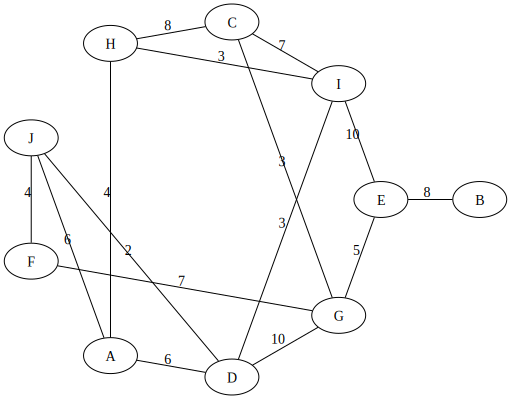

In [11]:
def showG(G, labels=None, directed=False, weighted=False, layout='circo'):
    dot = gv.Digraph("x") if directed else gv.Graph("y")
    dot.graph_attr['layout'] = layout
    n = len(G)
    for u in range(n):
        if labels:
            dot.node(str(u), labels[u])
        else:
            dot.node(str(u))
    edges = set()
    for u in range(n):
        if weighted:
            for v, w in G[u]:
                if directed:
                    dot.edge(str(u), str(v), str(w))
                    continue
                if f'{u},{v}' not in edges:
                    edges.add(f'{u},{v}')
                    edges.add(f'{v},{u}')
                    dot.edge(str(u), str(v), str(w))
            continue
        for v in G[u]:
            if directed:
                dot.edge(str(u), str(v))
                continue
            if f'{u},{v}' not in edges:
                edges.add(f'{u},{v}')
                edges.add(f'{v},{u}')
                dot.edge(str(u), str(v))

    return dot

showG(randomG(10, 15, weighted=True),
      labels='ABCDEFGHIJ', weighted=True)

In [12]:
def bfs(G, s):
    n = len(G)
    visited = [False]*n
    parents = [-1]*n
    queue = [s]
    visited[s] = True
    while queue:
        u = queue.pop(0)
        for v in G[u]:
            if not visited[v]:
                visited[v] = True
                parents[v] = u
                queue.append(v)

    return parents

In [19]:
def dfs(G, s):
    n = len(G)
    visited = [False]*n
    parents = [-1]*n

    def _dfs(u):
        visited[u] = True
        for v in G[u]:
            if not visited[v]:
                parents[v] = u
                _dfs(v)

    _dfs(s)

    return parents

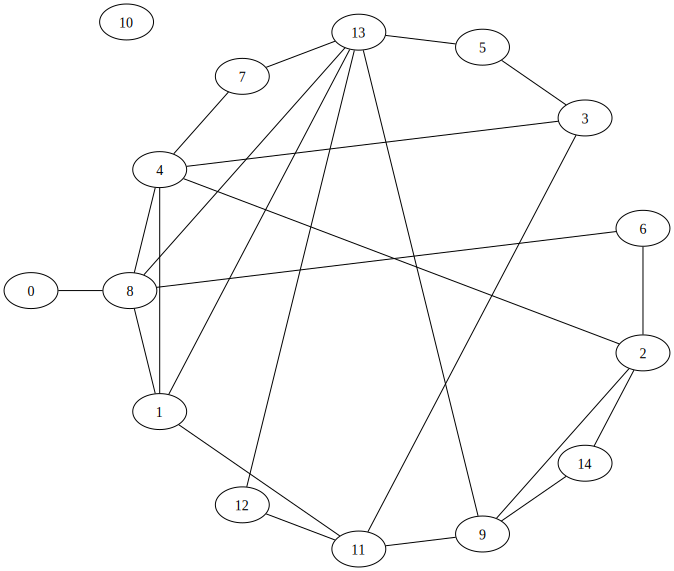

In [17]:
G = randomG(15, 23)
showG(G)

In [18]:
bfs(G, 0)

[-1, 8, 4, 4, 8, 13, 8, 13, 0, 13, -1, 1, 13, 8, 9]

In [20]:
dfs(G, 0)

[-1, 13, 9, 4, 2, 3, 2, 4, 0, 11, -1, 1, 11, 8, 2]